# Ejemplo 1: Mi primer red neuronal

In [1]:
# !pip install tensorflow

In [3]:
# TF es una biblioteca que nos permite entrenar modelos de aprendizaje automático
import tensorflow as tf
import numpy as np

# Para mostrar gráficas
import matplotlib.pyplot as plt
%matplotlib inline

# PIL es una librería para mostrar y manipular imágenes en python
from PIL import Image

# Anaconda MAC fixing problem
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Problema de clasificacion

A continuación veremos un problema de clasificación que resolveremos con un red neuronal multicapa donde usaremos funciones de activación no lineales. La ventaja de añadir capas ocultas a una red es que permite resolver problemas más complejos.

MNIST dataset

En este problema usaremos la base de datos de imágenes MNIST, que está compuesta por imágenes de números escritos a mano del 0 al 9. El propósito de este problema será construir una red neuronal multicapa donde la entrada de los datos será una imagen y la salida será el número que hay en esa imagen.

Preparar datos de entrenamiento
Para empezar debemos descargar los datos. Tensorflow viene con varios ejemplos de bases de datos que poder utilizar, MNIST es uno de ellos, por lo que podemos descargarlo directamente con Tensorflow:

In [5]:
# https://keras.io/examples/
# Cargamos las imgagenes etiquetadas y las dividimos en Train y Test
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [11]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

Vamos a mostrar una pequeña muestra de las imágenes:

In [7]:
def show_images(images, gray=True):
    fig=plt.figure(figsize=(8, 8))
    index = np.random.randint(len(images), size=100)
    for i in range(100):
        fig.add_subplot(10, 10, i+1)
        plt.axis('off')
        if gray:
            color = 'gray'
        else:
            color = None
        plt.imshow(images[index[i]].reshape([28, 28]), cmap=color)
    plt.show()

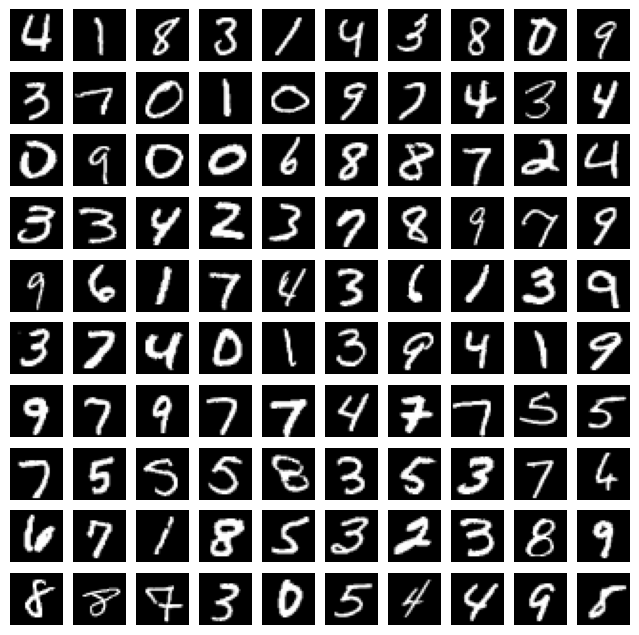

In [9]:
show_images(x_train)

Las imágenes son de tamaño 28x28 pixeles y en blanco y negro. Podemos observar cómo tenemos distintos números y al ser escritos a mano tienen formas distintas, por lo que será un reto para nuestra red poder aprender a diferencia entre números y aprender que números son los mismos.

Las imágen son _arrays_ de _numpy_ por lo que podemos tratarlas como tal y usar los atributos y funciones que tienen, como el atributo `shape`.

A continuación, vamos a ver más detalles de los datos de entrada.

In [10]:
print("Numero de imágenes a entrenar: ", x_train.shape[0])
print("Numero de imágenes de prueba: ", x_test.shape[0])
print("Tamaño de imagenes a entrenar: ", x_train.shape)

Numero de imágenes a entrenar:  60000
Numero de imágenes de prueba:  10000
Tamaño de imagenes a entrenar:  (60000, 28, 28)


In [12]:
print("Ejemplo de salida: ", y_train[0])

Ejemplo de salida:  5


Al ser las imágenes en blanco y negro, cada pixel tiene un valor entre el 0 y el 255, siendo 0 el negro y 255 el blanco. Veamos los valores completos de una imágen:

In [13]:
y_train[0] # Analizamos qué valor tiene etiquetado la primer imagen del dataset

5

In [14]:
img = x_train[0] # Analizamos qué valores nos devuelve la primer imágen del dataset
print("Valores de una imágen:")
print(img)

Valores de una imágen:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253

La imagen que estamos viendo es la siguiente:

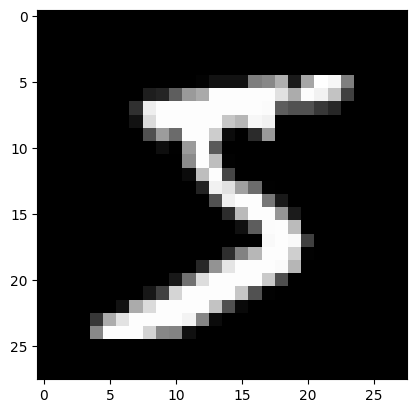

In [15]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

Para ver el valor de `y` de esta imagen podemos acceder a su correspondiente valor:

In [ ]:
y_train[0]

5

Al ser los valores entre el 0 y el 255, para que el resultado del entrenamiento sea más óptimo es preferible **normalizar** estos valores entre 0 y 1. Se puede realizar de la siguiente forma:

In [16]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [17]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Construir la red

Empecemos definiendo la entrada y la salida de los datos de nuestra red:

* La **entrada** de los datos serán las imágenes que son de dimensiones 28x28 pixeles, que en total son $28x28 = 784$ valores del 0 al 1 ya que son imágenes en blanco y negro normalizadas. Por lo tanto, la entrada de nuestra red será de dimensión 784 (28x28).
* La **salida** de nuestra red será la predicción del número que hay en la imagen. Como tenemos dígitos del 0 al 9 la dimensión de la salida de la red será de dimensión 10 por cada categoría, donde cada valor será la probabilidad de dicho número. La categoría con la probabilidad más alta, será el número que nuestra red clasifique.


Para definir el tipo de función de activación que tendrá cada capa, a la hora de definir la capa podemos definir en el argumento `activation` el tipo de función que es. La funciones de activación que ofrece TensorFlow son las siguiente: https://www.tensorflow.org/api_docs/python/tf/keras/activations.

In [23]:
# Creamos las capas de la red neuronal
model = tf.keras.models.Sequential([
  # Establecemos el tamaño de entrada y ransformamos los datos en un plano unidimensional
  # Basicamente convertimos 28x28 en un vector de 784 elementos
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  # Agregamos una hidden layer con 64 neuronas y funcion de activación Relu
  tf.keras.layers.Dense(128, activation='relu'),
  # Agregamos otra hidden layer con 128 neuronas y funcion de activación Relu
  tf.keras.layers.Dense(128, activation='relu'),
    # Agregamos una hidden layer con 64 neuronas y funcion de activación Relu
  tf.keras.layers.Dense(64, activation='relu'),
  # Agregamos nuestra capa de salida de 10 neuronas y función de activación de Softmax
  # Softmax se usa para generar probabilidades para cada clase, asegurando que la suma de todas las salidas sea 1
  tf.keras.layers.Dense(10, activation='softmax')
])

In [24]:
# Model summary proporciona un resumen de lo definido anteriormente
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 125898 (491.79 KB)
Trainable params: 125898 (491.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<a id="section2.4"></a>
# <font color="#004D7F" size=4>Entrenamiento</font>
Una vez que ya tenemos nuestra red definida, configuraremos el entrenamiento. En la configuración definiremos:

- `optimizer`: usaremos el optimizador `adam` y cambiaremos el `learning rate`.
- `loss`: usaremos como función de coste *Sparse Categorical Crossentropy* ya que es un problema de clasificación y la salida está con etiquetas del 0 al 9.
- `metrics`: al ser un problema de clasificación esta vez evaluaremos la precision del modelo.
- `batch_size`: estableceremos un tamaño de *batch* de 128.
- `epochs`: estableceremos el número de *epochs* em 5.

In [ ]:
# Definimos el optimizador y el factor de entrenamiento
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
# learning rate determina la magnitud de los ajustes que se hacen a los pesos de la red neuronal durante el proceso de entrenamiento
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compilamos el modelo con optimizer ADAM
# Utilizamos loss='sparse_categorical_crossentropy' porque se usa en problemas de clasificacion
# Utilizamos metrics=['accuracy'] para poder observar los datos de precision de 0 a 1
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0142 - accuracy: 0.9951 - val_loss: 0.1033 - val_accuracy: 0.9779
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0128 - accuracy: 0.9956 - val_loss: 0.0935 - val_accuracy: 0.9809
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0154 - accuracy: 0.9952 - val_loss: 0.1136 - val_accuracy: 0.9756
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0116 - accuracy: 0.9961 - val_loss: 0.1384 - val_accuracy: 0.9724
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0126 - accuracy: 0.9957 - val_loss: 0.1226 - val_accuracy: 0.9763
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0123 - accuracy: 0.9960 - val_loss: 0.1449 - val_accuracy: 0.9761
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0126 - accuracy: 0.9955 - val_loss: 0.1382 - val_accuracy:

KeyboardInterrupt: 

En la salida, podemos comprabar cómo la red aprende con cada *epoch* reduciento el error al predecir y aumentando la precisión en la predicción. Si cambiamos la configuración o las capas de nuestra red, el entrenamiento sera distinto, podría tardar más o incluso podría no aprender.

<a id="section2.5"></a>
# <font color="#004D7F" size=4>Evaluar modelo</font>

A continuación vamos a evaluar como de bien funciona el modelo visualizando el error y la precisión.

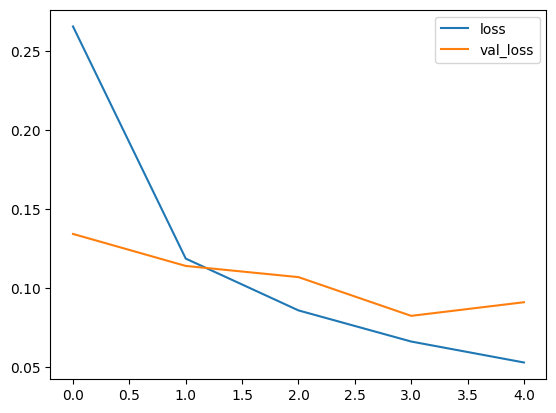

In [ ]:
# Realizamos un plot del proceso de pérdidas
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

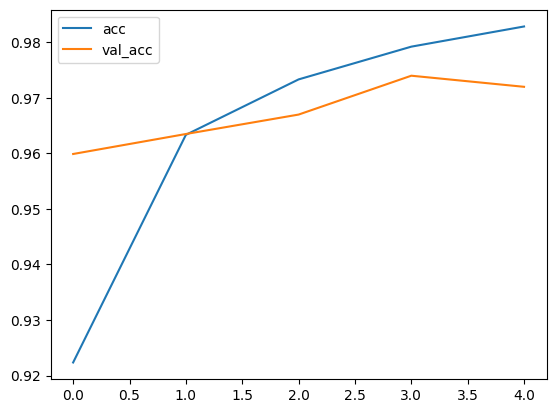

In [ ]:
# Realizamos un plot del proceso de precisión
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.legend()

Podemos observar como se comporta el modelo con los casos de test:

1/1 [==============================] - 0s 21ms/step


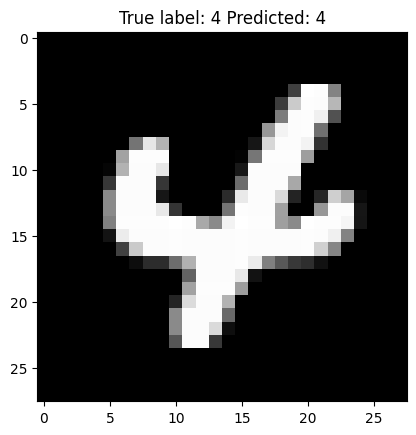

In [ ]:
# Cogemos un indice al azar y su prediccion
i = np.random.choice(range(0,x_test.shape[0]))
prediction = model.predict(np.array([x_test[i]])).argmax(axis=1)[0]

plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], prediction));

Podemos mostrar algunos falsos positivos para ver donde falla nuestro modelo:

313/313 [==============================] - 1s 2ms/step


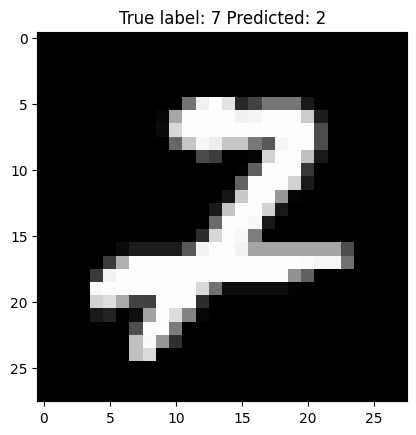

In [ ]:
# Obtenemos las predicciones del conjunto de test
p_test = model.predict(x_test).argmax(axis=1)

# Filtramos cogiendo las predicciones erroneas
misclassified_idx = np.where(p_test != y_test)[0]

# Cogemos un indice al azar
i = np.random.choice(misclassified_idx)

plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

313/313 [==============================] - 1s 4ms/step


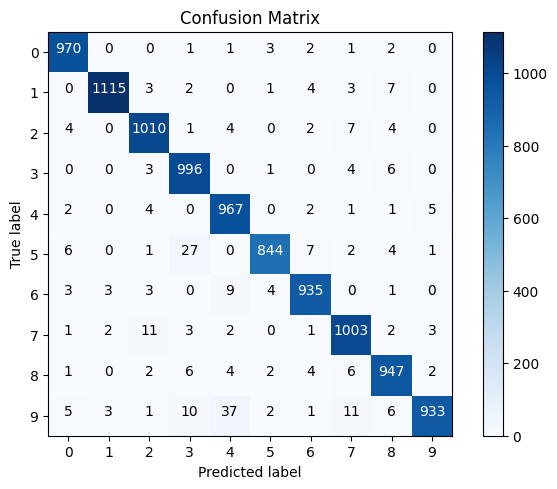

In [ ]:
# prompt: now create a confusion matrix of the neural network with numbers

from sklearn.metrics import confusion_matrix
import itertools

# Get the predictions for the test data
y_pred = model.predict(x_test)

# Convert the predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true class labels for the test data
y_true = y_test

# Generate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(set(y_true)))
plt.xticks(tick_marks, set(y_true))
plt.yticks(tick_marks, set(y_true))

# Fill the matrix with the values
thresh = confusion_mtx.max() / 2.
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
    plt.text(j, i, format(confusion_mtx[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_mtx[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
# prompt: Create a new traning of NN with 5 different optimizers

opt1 = tf.keras.optimizers.SGD(learning_rate=0.01)
opt2 = tf.keras.optimizers.RMSprop(learning_rate=0.01)
opt3 = tf.keras.optimizers.Adam(learning_rate=0.01)
opt4 = tf.keras.optimizers.Adadelta(learning_rate=0.01)
opt5 = tf.keras.optimizers.Adagrad(learning_rate=0.01)

model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model5 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model1.compile(optimizer=opt1,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model2.compile(optimizer=opt2,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model3.compile(optimizer=opt3,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model4.compile(optimizer=opt4,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model5.compile(optimizer=opt5,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

hist1 = model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)
hist2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)
hist3 = model3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)
hist4 = model4.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)
hist5 = model5.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)



Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6766 - accuracy: 0.8153 - val_loss: 0.3272 - val_accuracy: 0.9084
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3058 - accuracy: 0.9118 - val_loss: 0.2626 - val_accuracy: 0.9264
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2547 - accuracy: 0.9265 - val_loss: 0.2315 - val_accuracy: 0.9315
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2227 - accuracy: 0.9359 - val_loss: 0.2031 - val_accuracy: 0.9400
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1990 - accuracy: 0.9426 - val_loss: 0.1853 - val_accuracy: 0.9446
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3604 - accuracy: 0.9024 - val_loss: 0.2543 - val_accuracy: 0.9317
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2946 - accuracy: 0.9309 - val_loss: 0.3224 - val_accuracy: 0.9316

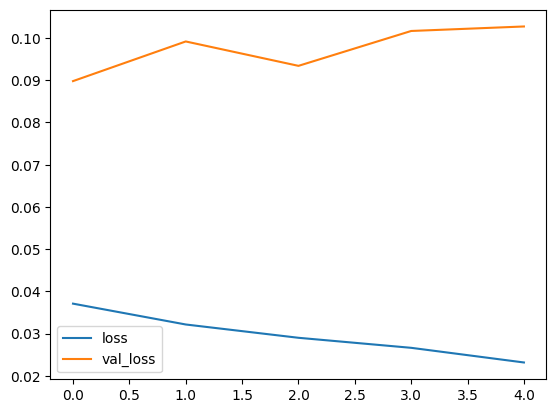

In [ ]:
# Realizamos un plot del proceso de pérdidas
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

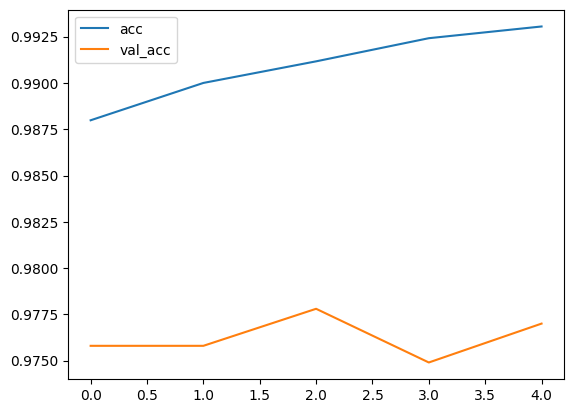

In [ ]:
# Realizamos un plot del proceso de precisión
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.legend()